In [2]:
import subprocess
import time
from subprocess import Popen, PIPE
import matplotlib.pyplot as plt

In [3]:
def average_command_elapsed_time(cmd, n_reps=2):
    print('running "%s" ...' % cmd)
    avg_elapsed_time = 0
    for _ in range(n_reps):
        start = time.time()
        result = Popen(cmd, shell=True, stdout=PIPE)
        out = result.stdout.read()
        elapsed_time = time.time() - start
        avg_elapsed_time += elapsed_time
        print("\telapsed_time = %f seconds, out = %s" % (elapsed_time, out))
    avg_elapsed_time /= n_reps
    print("\tavg_elapsed_time = %f seconds" % avg_elapsed_time)
    return avg_elapsed_time

In [34]:
def plot_speedup_and_efficiency_vs_num_processes(num_processes_list, ns, n2elapsedTimes, title):
    assert num_processes_list[0] == 1    
    
    n2speedups = {
        n:[n2elapsedTimes[n][0]/x for x in n2elapsedTimes[n]] for n in ns
    }
    n2efficiencies = {
        n:[s/k for s,k in zip(n2speedups[n],num_processes_list)] for n in ns
    }
    
    plt.figure(figsize=(14,7))
    plt.suptitle(title)
    
    ax1 = plt.subplot(121)
    for n in ns:
        ax1.plot(num_processes_list, n2speedups[n], label="N=%d (serial time=%.3f)" % (n, n2elapsedTimes[n][0]))
    ax1.set_xlabel('Number of processes')
    ax1.set_ylabel('Speedup')
    ax1.set_title('Speedup vs Number of processes')
    ax1.legend()
    
    ax2 = plt.subplot(122)
    for n in ns:
        ax2.plot(num_processes_list, n2efficiencies[n], label="N=%d (serial time=%.3f)" % (n, n2elapsedTimes[n][0]))
    ax2.set_xlabel('Number of processes')
    ax2.set_ylabel('Efficiency')
    ax2.set_title('Efficiency vs Number of processes')
    ax2.legend()
    
    plt.show()

In [5]:
!make

mpicc -o subsetsum-mpi.o subsetsum-mpi.c


In [14]:
Ns = (28, 30)
num_processes = list(range(1, 51))

## 1) test cases with NO solutions

In [38]:
# command_template = ("salloc -p all -n %d --nodelist=hydra,kraken mpirun -mca btl ^openib"
#                     " ./subsetsum-mpi.o < ./testcases/N=%d_nosolution.txt")
command_template = "mpiexec -n %d ./subsetsum-mpi.o < testcases/N=%d_nosolution.txt"
command_template

'mpiexec -n %d ./subsetsum-mpi.o < testcases/N=%d_nosolution.txt'

In [39]:
n2elapsedTimes_nosol = dict()
for N in Ns:
    elapsed_times = [average_command_elapsed_time(command_template % (k, N)) for k in num_processes]
    n2elapsedTimes_nosol[N] = elapsed_times

running "mpiexec -n 1 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 3.972146 seconds, out = b'0\n'
	elapsed_time = 3.996440 seconds, out = b'0\n'
	avg_elapsed_time = 3.984293 seconds
running "mpiexec -n 2 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 4.309381 seconds, out = b'0\n'
	elapsed_time = 4.209831 seconds, out = b'0\n'
	avg_elapsed_time = 4.259606 seconds
running "mpiexec -n 3 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 2.234445 seconds, out = b'0\n'
	elapsed_time = 2.218096 seconds, out = b'0\n'
	avg_elapsed_time = 2.226271 seconds
running "mpiexec -n 4 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 2.146851 seconds, out = b'0\n'
	elapsed_time = 2.149637 seconds, out = b'0\n'
	avg_elapsed_time = 2.148244 seconds
running "mpiexec -n 5 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 1.249544 seconds, out = b'0\n'
	elapsed_time = 1.255303 seconds, out = b'0\

	elapsed_time = 0.618058 seconds, out = b'0\n'
	elapsed_time = 0.629885 seconds, out = b'0\n'
	avg_elapsed_time = 0.623972 seconds
running "mpiexec -n 41 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 0.626548 seconds, out = b'0\n'
	elapsed_time = 0.651743 seconds, out = b'0\n'
	avg_elapsed_time = 0.639146 seconds
running "mpiexec -n 42 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 0.694906 seconds, out = b'0\n'
	elapsed_time = 0.696949 seconds, out = b'0\n'
	avg_elapsed_time = 0.695927 seconds
running "mpiexec -n 43 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 0.670814 seconds, out = b'0\n'
	elapsed_time = 0.659204 seconds, out = b'0\n'
	avg_elapsed_time = 0.665009 seconds
running "mpiexec -n 44 ./subsetsum-mpi.o < testcases/N=28_nosolution.txt" ...
	elapsed_time = 0.651050 seconds, out = b'0\n'
	elapsed_time = 0.655926 seconds, out = b'0\n'
	avg_elapsed_time = 0.653488 seconds
running "mpiexec -n 45 ./subsetsu

	elapsed_time = 1.944413 seconds, out = b'0\n'
	avg_elapsed_time = 1.822229 seconds
running "mpiexec -n 30 ./subsetsum-mpi.o < testcases/N=30_nosolution.txt" ...
	elapsed_time = 1.896666 seconds, out = b'0\n'
	elapsed_time = 1.921908 seconds, out = b'0\n'
	avg_elapsed_time = 1.909287 seconds
running "mpiexec -n 31 ./subsetsum-mpi.o < testcases/N=30_nosolution.txt" ...
	elapsed_time = 1.608479 seconds, out = b'0\n'
	elapsed_time = 1.929698 seconds, out = b'0\n'
	avg_elapsed_time = 1.769088 seconds
running "mpiexec -n 32 ./subsetsum-mpi.o < testcases/N=30_nosolution.txt" ...
	elapsed_time = 1.622937 seconds, out = b'0\n'
	elapsed_time = 1.892514 seconds, out = b'0\n'
	avg_elapsed_time = 1.757726 seconds
running "mpiexec -n 33 ./subsetsum-mpi.o < testcases/N=30_nosolution.txt" ...
	elapsed_time = 1.311923 seconds, out = b'0\n'
	elapsed_time = 1.310623 seconds, out = b'0\n'
	avg_elapsed_time = 1.311273 seconds
running "mpiexec -n 34 ./subsetsum-mpi.o < testcases/N=30_nosolution.txt" ...
	e

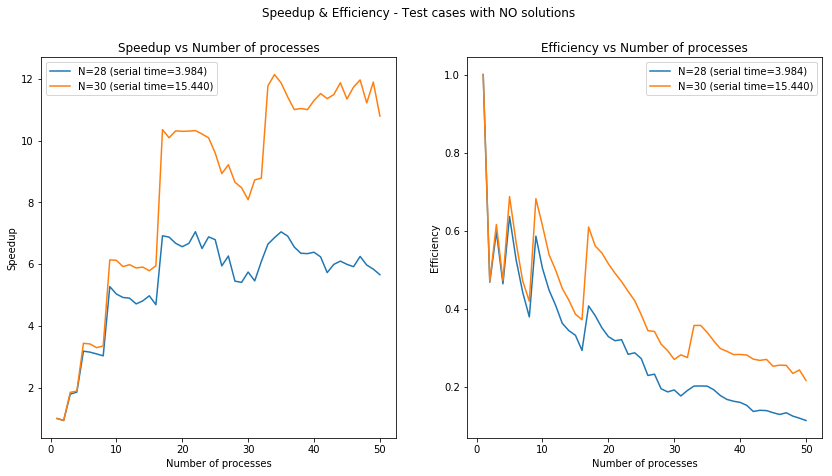

In [40]:
plot_speedup_and_efficiency_vs_num_processes(num_processes, Ns, n2elapsedTimes_nosol,
                                             "Speedup & Efficiency - Test cases with NO solutions")

## 2) test cases with 1 solution

In [30]:
# command_template = ("salloc -p all -n %d --nodelist=hydra,kraken mpirun -mca btl ^openib"
#                     " ./subsetsum-mpi.o < ./testcases/N=%d_uniquesolution.txt")
command_template = "mpiexec -n %d ./subsetsum-mpi.o < testcases/N=%d_uniquesolution.txt"
command_template

'mpiexec -n %d ./subsetsum-mpi.o < testcases/N=%d_uniquesolution.txt'

In [32]:
n2elapsedTimes_1sol = dict()
for N in Ns:
    elapsed_times = [average_command_elapsed_time(command_template % (k, N)) for k in num_processes]
    n2elapsedTimes_1sol[N] = elapsed_times

running "mpiexec -n 1 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 4.082685 seconds, out = b'1 300000\n'
	elapsed_time = 3.989341 seconds, out = b'1 300000\n'
	avg_elapsed_time = 4.036013 seconds
running "mpiexec -n 2 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 4.187672 seconds, out = b'1 300000\n'
	elapsed_time = 4.208874 seconds, out = b'1 300000\n'
	avg_elapsed_time = 4.198273 seconds
running "mpiexec -n 3 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 2.202271 seconds, out = b'1 300000\n'
	elapsed_time = 2.179872 seconds, out = b'1 300000\n'
	avg_elapsed_time = 2.191071 seconds
running "mpiexec -n 4 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 2.127220 seconds, out = b'1 300000\n'
	elapsed_time = 2.138700 seconds, out = b'1 300000\n'
	avg_elapsed_time = 2.132960 seconds
running "mpiexec -n 5 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time =

	elapsed_time = 0.574329 seconds, out = b'1 300000\n'
	elapsed_time = 0.564340 seconds, out = b'1 300000\n'
	avg_elapsed_time = 0.569335 seconds
running "mpiexec -n 38 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 0.502247 seconds, out = b'1 300000\n'
	elapsed_time = 0.537728 seconds, out = b'1 300000\n'
	avg_elapsed_time = 0.519987 seconds
running "mpiexec -n 39 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 0.561558 seconds, out = b'1 300000\n'
	elapsed_time = 0.589333 seconds, out = b'1 300000\n'
	avg_elapsed_time = 0.575445 seconds
running "mpiexec -n 40 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 0.527714 seconds, out = b'1 300000\n'
	elapsed_time = 0.583696 seconds, out = b'1 300000\n'
	avg_elapsed_time = 0.555705 seconds
running "mpiexec -n 41 ./subsetsum-mpi.o < testcases/N=28_uniquesolution.txt" ...
	elapsed_time = 0.599569 seconds, out = b'1 300000\n'
	elapsed_time = 0.564619 seconds, out 

	elapsed_time = 1.450603 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.480136 seconds
running "mpiexec -n 24 ./subsetsum-mpi.o < testcases/N=30_uniquesolution.txt" ...
	elapsed_time = 1.461730 seconds, out = b'1 300000\n'
	elapsed_time = 1.458078 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.459904 seconds
running "mpiexec -n 25 ./subsetsum-mpi.o < testcases/N=30_uniquesolution.txt" ...
	elapsed_time = 1.566468 seconds, out = b'1 300000\n'
	elapsed_time = 1.636645 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.601556 seconds
running "mpiexec -n 26 ./subsetsum-mpi.o < testcases/N=30_uniquesolution.txt" ...
	elapsed_time = 1.555194 seconds, out = b'1 300000\n'
	elapsed_time = 1.540403 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.547799 seconds
running "mpiexec -n 27 ./subsetsum-mpi.o < testcases/N=30_uniquesolution.txt" ...
	elapsed_time = 1.925874 seconds, out = b'1 300000\n'
	elapsed_time = 1.701331 seconds, out = b'1 300000\n'
	avg_elapsed_time = 1.813602 seconds
r

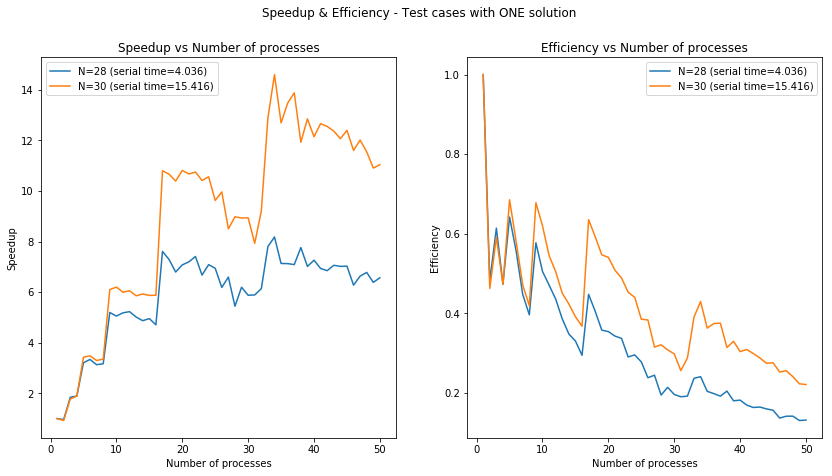

In [35]:
plot_speedup_and_efficiency_vs_num_processes(num_processes, Ns, n2elapsedTimes_1sol,
                                             "Speedup & Efficiency - Test cases with ONE solution")